# Import the relevant packages

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist

## Load the Fashion MNIST dataset and preprocess the data

In [2]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize pixel values to range [0, 1]
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Add a single channel dimension (for grayscale images)
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

# Convert labels to one-hot encoding
num_classes = 10
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

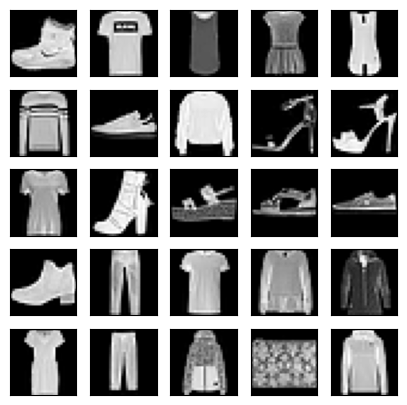

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i]/255.0, cmap='gray')
plt.show()

# Define the CNN model

In [4]:
model = models.Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

## Compile the model

In [5]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model

In [6]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.1)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6686 - loss: 0.9264 - val_accuracy: 0.8347 - val_loss: 0.4460
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.8449 - loss: 0.4216 - val_accuracy: 0.8650 - val_loss: 0.3737
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.8739 - loss: 0.3465 - val_accuracy: 0.8747 - val_loss: 0.3409
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.8905 - loss: 0.3084 - val_accuracy: 0.8918 - val_loss: 0.2990
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.8983 - loss: 0.2791 - val_accuracy: 0.8938 - val_loss: 0.2861
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.9072 - loss: 0.2561 - val_accuracy: 0.9037 - val_loss: 0.2646
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.9133 - loss: 0.2404 - val_accuracy: 0.8963 - val_loss: 0.2818
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9188 - loss: 0.2209 - 

# Evaluate the model and print test loss and accuracy

In [7]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss: {0:.2f}. Test Accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100))

Test loss: 0.30. Test Accuracy: 91.22%


## training-validation accuracy and loss curves

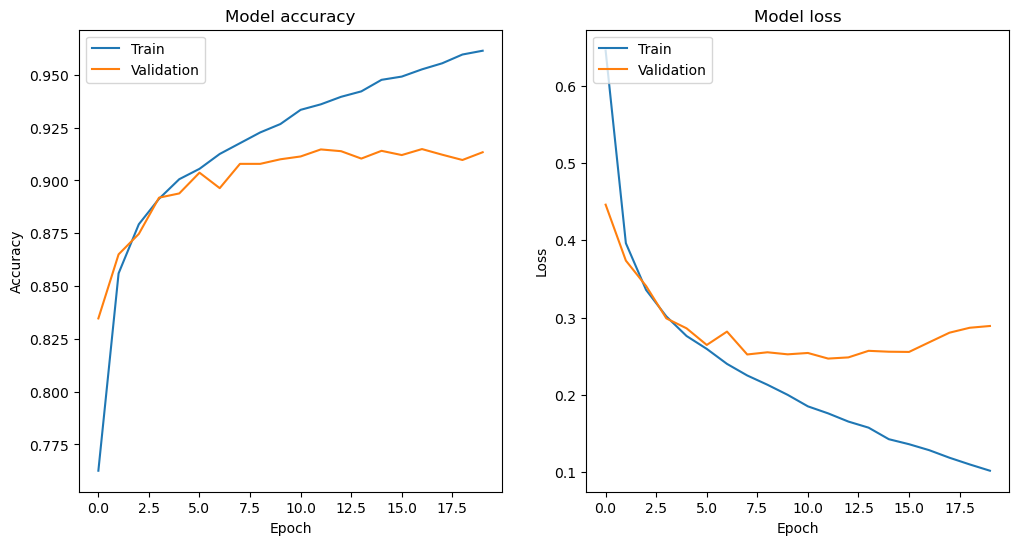

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [8]:
import tensorflow as tf

# Save the model in SavedModel format
tf.saved_model.save(model, "fashion_mnist_cnn_model_1")

INFO:tensorflow:Assets written to: fashion_mnist_cnn_model_1\assets


INFO:tensorflow:Assets written to: fashion_mnist_cnn_model_1\assets
